### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import ast

### Loading the dataset

In [2]:
expenditures_df = pd.read_csv('../SavedData/dataset2_expenditures.csv')
payments_df= pd.read_csv('../SavedData/dataset2_payments.csv')
expenditures_users_df = pd.read_csv('../SavedData/dataset2_expenditures_by_users.csv')
payments_users_df = pd.read_csv('../SavedData/dataset2_payments_by_users.csv')
simulated_cleaned_tx_df = pd.read_csv('../SavedData/dataset2_cleaned.csv')

In [3]:
simulated_cleaned_tx_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
0,01/01/2023,00:00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,01/01/2023,00:00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,01/01/2023,00:00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,01/01/2023,00:00:00,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,01/01/2023,00:00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
229189,06/12/2023,20:54:00,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
229190,06/12/2023,20:55:00,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
229191,06/12/2023,21:05:00,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
229192,06/12/2023,21:13:00,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [4]:
expenditures_users_df

,Account No,total_transactions,total_spent,median_transaction,mean_transaction,business_interactions,user_interactions,most_recent_transaction
0,101531259.0,110,17627.58,88.580,160.250727,"['LBG', 'Disney', 'Grand Union BJJ', 'Matalan'...",[],2023-12-05
1,104832000.0,150,25115.52,49.920,167.436800,"['LBG', 'Netflix', 'Grand Union BJJ', 'Blizzar...",[587923845.0],2023-12-03
2,105375973.0,146,10067.28,48.160,68.953973,"['PureGym', 'Netflix', 'Amazon', ""Blackwell's""...",[],2023-12-03
3,106601471.0,180,7760.01,19.965,43.111167,"['Mojang Studios', 'Netflix', 'The Crown', ""Bl...",[],2023-12-06
4,108481285.0,344,15062.28,21.510,43.785698,"['Disney', 'Amazon', 'PureGym', ""Blackwell's"",...",[913801979.0],2023-12-06
...,...,...,...,...,...,...,...,...
971,995615876.0,172,17598.80,52.920,102.318605,"['LBG', 'Blizzard', 'Mojang Studios', 'The Cro...",[],2023-12-05
972,996042490.0,243,35268.01,34.970,145.135844,"['Halifax', 'Netflix', 'PureGym', ""Blackwell's...",[792845450.0],2023-12-06
973,998390769.0,140,21323.35,69.990,152.309643,"['Halifax', 'Disney', 'Netflix', 'Mojang Studi...",[],2023-12-01
974,998405607.0,145,8816.16,35.070,60.801103,"['Xbox', 'Blizzard', 'Mojang Studios', 'Netfli...",[],2023-11-30


### Splitting the data into training and testing 

In [5]:
copied_simulated_tx_df = simulated_cleaned_tx_df.copy()

# Splitting the copied dataset into historical_transactions (95%) and testing_transactions (5%)
training_transactions, testing_transactions = train_test_split(copied_simulated_tx_df, test_size=0.1, random_state=12)

# Displaying the shapes to verify the split
training_transactions.shape, testing_transactions.shape


((206274, 8), (22920, 8))

In [6]:
testing_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
50365,14/03/2023,18:33:00,712474734.0,-1324.548831,-31.23,NaN,Deliveroo,2023-03-14 18:33:00
50317,14/03/2023,17:28:00,419550103.0,6544.593463,-125.30,NaN,Loosely Fitted,2023-03-14 17:28:00
156768,31/08/2023,23:59:00,834581602.0,925.931550,-7.00,NaN,Xbox,2023-08-31 23:59:00
198076,31/10/2023,09:27:00,250957494.0,1090.427100,-37.99,NaN,Sports Direct,2023-10-31 09:27:00
46751,05/03/2023,16:34:00,675231808.0,4038.532728,-158.90,NaN,Selfridges,2023-03-05 16:34:00
...,...,...,...,...,...,...,...,...
146741,16/08/2023,10:05:00,779946617.0,13089.944442,-4.84,NaN,AMAZON,2023-08-16 10:05:00
99244,02/06/2023,10:01:00,497809732.0,1214.287223,-1.50,NaN,Five Senses Art,2023-06-02 10:01:00
165435,10/09/2023,17:00:00,146909202.0,4552.412277,-77.00,NaN,Topshop,2023-09-10 17:00:00
125773,16/07/2023,07:12:00,678330503.0,4077.564304,-1.56,NaN,Amazon,2023-07-16 07:12:00


### Splitting the training transactions into payments and expenditures

In [7]:
payments_training_df = training_transactions[training_transactions['Amount'] > 0]
expenditures_training_df = training_transactions[training_transactions['Amount'] < 0]

In [8]:
# Taking the absolute values of the amount column
expenditures_training_df["Amount"] = expenditures_training_df["Amount"].abs()

expenditures_training_df

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_57505/721076894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_training_df["Amount"] = expenditures_training_df["Amount"].abs()


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
215690,22/11/2023,18:12:00,496674181.0,-2187.525472,111.38,NaN,Coop Local,2023-11-22 18:12:00
20958,31/01/2023,10:05:00,421881811.0,2363.284100,22.00,NaN,Sports Direct,2023-01-31 10:05:00
197261,30/10/2023,20:06:00,387957305.0,-2677.341106,37.99,NaN,Tesco,2023-10-30 20:06:00
63359,03/04/2023,08:51:00,120634201.0,1441.908700,41.04,NaN,Tesco,2023-04-03 08:51:00
6331,02/01/2023,18:47:00,713910252.0,2116.752100,140.49,NaN,Tesco,2023-01-02 18:47:00
...,...,...,...,...,...,...,...,...
206083,05/11/2023,07:55:00,550169791.0,22875.430900,45.04,NaN,Etsy,2023-11-05 07:55:00
36482,23/02/2023,12:38:00,554792076.0,2248.810443,75.74,NaN,Topshop,2023-02-23 12:38:00
40177,01/03/2023,00:00:00,624563756.0,-14.727071,822.00,NaN,LBG,2023-03-01 00:00:00
150781,24/08/2023,20:15:00,176922958.0,1440.312330,37.43,NaN,Deliveroo,2023-08-24 20:15:00


## Creating an anomaly detection model using IQR for thresholds

In [130]:
# Calculating Q1, Q3, and IQR for each account in 'from_totally_fake_account'
quartiles = expenditures_training_df.groupby('Account No')['Amount'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]

thresholds = quartiles.copy()
thresholds['Overall_Threshold_1_IQR'] = quartiles[0.75] + 1.5 * quartiles['IQR']
thresholds['Overall_Threshold_2_IQR'] = quartiles[0.75] + 3 * quartiles['IQR']
thresholds['Overall_Threshold_3_IQR'] = quartiles[0.75] + 5 * quartiles['IQR']

anomaly_detection_by_expenditures_df = thresholds


anomaly_detection_by_expenditures_df

,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR
Account No,,,,,,,
101531259.0,27.9675,88.580,117.7825,89.8150,252.50500,387.2275,566.8575
104832000.0,24.2775,50.950,117.4050,93.1275,257.09625,396.7875,583.0425
105375973.0,18.9900,46.030,114.0850,95.0950,256.72750,399.3700,589.5600
106601471.0,10.9200,21.970,44.5000,33.5800,94.87000,145.2400,212.4000
108481285.0,9.4400,20.970,44.9200,35.4800,98.14000,151.3600,222.3200
...,...,...,...,...,...,...,...
995615876.0,25.3925,54.735,109.2325,83.8400,234.99250,360.7525,528.4325
996042490.0,15.9900,34.490,93.4900,77.5000,209.74000,325.9900,480.9900
998390769.0,14.9900,69.980,131.7750,116.7850,306.95250,482.1300,715.7000


### Creating thresholds for each user to user transfers

In [170]:
# Threshold function
def calculate_thresholds(group, multiplier):
#     if len(group) <= 1:  # Check if there's only one expenditure
#         return np.nan  # Indicative value for groups with only one transaction
    quantiles = group['Amount'].quantile([0.25, 0.75])
    IQR = quantiles[0.75] - quantiles[0.25]
    threshold = quantiles[0.75] + multiplier * IQR
    return threshold

In [132]:

# Applying the adjusted function for each threshold calculation with different multipliers

# For Threshold 1 (1.5 * IQR)
thresholds_1 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 1.5)).reset_index(name='Threshold_1')
thresholds_structured_1 = thresholds_1.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_1']))).to_dict()

# For Threshold 2 (3 * IQR)
thresholds_2 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 3)).reset_index(name='Threshold_2')
thresholds_structured_2 = thresholds_2.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_2']))).to_dict()

# For Threshold 3 (5 * IQR)
thresholds_3 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 5)).reset_index(name='Threshold_3')
thresholds_structured_3 = thresholds_3.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_3']))).to_dict()

anomaly_detection_by_expenditures_df['Third_Party_Account_Threshold_1'] = anomaly_detection_by_expenditures_df.index.map(lambda x: thresholds_structured_1.get(x, np.nan))
anomaly_detection_by_expenditures_df['Third_Party_Account_Threshold_2'] = anomaly_detection_by_expenditures_df.index.map(lambda x: thresholds_structured_2.get(x, np.nan))
anomaly_detection_by_expenditures_df['Third_Party_Account_Threshold_3'] = anomaly_detection_by_expenditures_df.index.map(lambda x: thresholds_structured_3.get(x, np.nan))

In [133]:
anomaly_detection_by_expenditures_df

,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3
Account No,,,,,,,,,,
101531259.0,27.9675,88.580,117.7825,89.8150,252.50500,387.2275,566.8575,NaN,NaN,NaN
104832000.0,24.2775,50.950,117.4050,93.1275,257.09625,396.7875,583.0425,{587923845.0: 670.0},{587923845.0: 670.0},{587923845.0: 670.0}
105375973.0,18.9900,46.030,114.0850,95.0950,256.72750,399.3700,589.5600,NaN,NaN,NaN
106601471.0,10.9200,21.970,44.5000,33.5800,94.87000,145.2400,212.4000,NaN,NaN,NaN
108481285.0,9.4400,20.970,44.9200,35.4800,98.14000,151.3600,222.3200,{913801979.0: 2185.0},{913801979.0: 2552.5},{913801979.0: 3042.5}
...,...,...,...,...,...,...,...,...,...,...
995615876.0,25.3925,54.735,109.2325,83.8400,234.99250,360.7525,528.4325,NaN,NaN,NaN
996042490.0,15.9900,34.490,93.4900,77.5000,209.74000,325.9900,480.9900,{792845450.0: 1500.0},{792845450.0: 1500.0},{792845450.0: 1500.0}
998390769.0,14.9900,69.980,131.7750,116.7850,306.95250,482.1300,715.7000,NaN,NaN,NaN


### Creating thresholds for each user to business transactions

In [134]:
# For Threshold 1 (1.5 * IQR)
thresholds_1 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds(group, 1.5)).reset_index(name='Threshold_1')
thresholds_structured_1 = thresholds_1.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_1']))).to_dict()

# For Threshold 2 (3 * IQR)
thresholds_2 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds(group, 3)).reset_index(name='Threshold_2')
thresholds_structured_2 = thresholds_2.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_2']))).to_dict()

# For Threshold 3 (5 * IQR)
thresholds_3 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds(group, 5)).reset_index(name='Threshold_3')
thresholds_structured_3 = thresholds_3.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_3']))).to_dict()

anomaly_detection_by_expenditures_df['Business_Threshold_1'] = anomaly_detection_by_expenditures_df.index.map(lambda x: thresholds_structured_1.get(x, np.nan))
anomaly_detection_by_expenditures_df['Business_Threshold_2'] = anomaly_detection_by_expenditures_df.index.map(lambda x: thresholds_structured_2.get(x, np.nan))
anomaly_detection_by_expenditures_df['Business_Threshold_3'] = anomaly_detection_by_expenditures_df.index.map(lambda x: thresholds_structured_3.get(x, np.nan))

anomaly_detection_by_expenditures_df

,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3,Business_Threshold_1,Business_Threshold_2,Business_Threshold_3
Account No,,,,,,,,,,,,,
101531259.0,27.9675,88.580,117.7825,89.8150,252.50500,387.2275,566.8575,NaN,NaN,NaN,"{'Brilliant Brushes': 85.97999999999999, 'Deli...","{'Brilliant Brushes': 124.97999999999999, 'Del...","{'Brilliant Brushes': 176.97999999999996, 'Del..."
104832000.0,24.2775,50.950,117.4050,93.1275,257.09625,396.7875,583.0425,{587923845.0: 670.0},{587923845.0: 670.0},{587923845.0: 670.0},"{'A Cut Above': 200.0, 'Blizzard': 14.99, 'Boo...","{'A Cut Above': 200.0, 'Blizzard': 14.99, 'Boo...","{'A Cut Above': 200.0, 'Blizzard': 14.99, 'Boo..."
105375973.0,18.9900,46.030,114.0850,95.0950,256.72750,399.3700,589.5600,NaN,NaN,NaN,"{'AMAZON': 36.06, 'Amazon': 7.99, 'Blackwell's...","{'AMAZON': 36.06, 'Amazon': 7.99, 'Blackwell's...","{'AMAZON': 36.06, 'Amazon': 7.99, 'Blackwell's..."
106601471.0,10.9200,21.970,44.5000,33.5800,94.87000,145.2400,212.4000,NaN,NaN,NaN,"{'AMAZON': 3.1950000000000003, 'Amazon': 102.7...","{'AMAZON': 3.2475000000000005, 'Amazon': 145.3...","{'AMAZON': 3.317500000000001, 'Amazon': 202.13..."
108481285.0,9.4400,20.970,44.9200,35.4800,98.14000,151.3600,222.3200,{913801979.0: 2185.0},{913801979.0: 2552.5},{913801979.0: 3042.5},"{'AMAZON': 38.41, 'Amazon': 35.025000000000006...","{'AMAZON': 53.8, 'Amazon': 51.27000000000001, ...","{'AMAZON': 74.32, 'Amazon': 72.93, 'Blackwell'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995615876.0,25.3925,54.735,109.2325,83.8400,234.99250,360.7525,528.4325,NaN,NaN,NaN,"{'Blizzard': 14.99, 'Deliveroo': 33.9574999999...","{'Blizzard': 14.99, 'Deliveroo': 34.37, 'Fat F...","{'Blizzard': 14.99, 'Deliveroo': 34.9199999999..."
996042490.0,15.9900,34.490,93.4900,77.5000,209.74000,325.9900,480.9900,{792845450.0: 1500.0},{792845450.0: 1500.0},{792845450.0: 1500.0},"{'Blackwell's': 41.94, 'Blizzard': 14.99, 'Boo...","{'Blackwell's': 50.925, 'Blizzard': 14.99, 'Bo...","{'Blackwell's': 62.90499999999999, 'Blizzard':..."
998390769.0,14.9900,69.980,131.7750,116.7850,306.95250,482.1300,715.7000,NaN,NaN,NaN,"{'Amazon': 5.99, 'Blizzard': 14.99, 'Deliveroo...","{'Amazon': 5.99, 'Blizzard': 14.99, 'Deliveroo...","{'Amazon': 5.99, 'Blizzard': 14.99, 'Deliveroo..."


In [135]:
# Extracting keys from 'transfer_to_accounts_threshold_1_IQR' to create 'user_user_interaction'
anomaly_detection_by_expenditures_df['user_user_interaction'] = anomaly_detection_by_expenditures_df['Third_Party_Account_Threshold_1'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else None)

# Extracting keys from 'industry_threshold_1_IQR' to create 'user_industry_interaction'
anomaly_detection_by_expenditures_df['user_business_interaction'] = anomaly_detection_by_expenditures_df['Business_Threshold_1'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else None)

anomaly_detection_by_expenditures_df


,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3,Business_Threshold_1,Business_Threshold_2,Business_Threshold_3,user_user_interaction,user_business_interaction
Account No,,,,,,,,,,,,,,,
101531259.0,27.9675,88.580,117.7825,89.8150,252.50500,387.2275,566.8575,NaN,NaN,NaN,"{'Brilliant Brushes': 85.97999999999999, 'Deli...","{'Brilliant Brushes': 124.97999999999999, 'Del...","{'Brilliant Brushes': 176.97999999999996, 'Del...",None,"[Brilliant Brushes, Deliveroo, Disney, Fat Fac..."
104832000.0,24.2775,50.950,117.4050,93.1275,257.09625,396.7875,583.0425,{587923845.0: 670.0},{587923845.0: 670.0},{587923845.0: 670.0},"{'A Cut Above': 200.0, 'Blizzard': 14.99, 'Boo...","{'A Cut Above': 200.0, 'Blizzard': 14.99, 'Boo...","{'A Cut Above': 200.0, 'Blizzard': 14.99, 'Boo...",[587923845.0],"[A Cut Above, Blizzard, Boots, Deliveroo, Etsy..."
105375973.0,18.9900,46.030,114.0850,95.0950,256.72750,399.3700,589.5600,NaN,NaN,NaN,"{'AMAZON': 36.06, 'Amazon': 7.99, 'Blackwell's...","{'AMAZON': 36.06, 'Amazon': 7.99, 'Blackwell's...","{'AMAZON': 36.06, 'Amazon': 7.99, 'Blackwell's...",None,"[AMAZON, Amazon, Blackwell's, Coop Local, Deli..."
106601471.0,10.9200,21.970,44.5000,33.5800,94.87000,145.2400,212.4000,NaN,NaN,NaN,"{'AMAZON': 3.1950000000000003, 'Amazon': 102.7...","{'AMAZON': 3.2475000000000005, 'Amazon': 145.3...","{'AMAZON': 3.317500000000001, 'Amazon': 202.13...",None,"[AMAZON, Amazon, Blackwell's, Blizzard, Boots,..."
108481285.0,9.4400,20.970,44.9200,35.4800,98.14000,151.3600,222.3200,{913801979.0: 2185.0},{913801979.0: 2552.5},{913801979.0: 3042.5},"{'AMAZON': 38.41, 'Amazon': 35.025000000000006...","{'AMAZON': 53.8, 'Amazon': 51.27000000000001, ...","{'AMAZON': 74.32, 'Amazon': 72.93, 'Blackwell'...",[913801979.0],"[AMAZON, Amazon, Blackwell's, Boots, Brilliant..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995615876.0,25.3925,54.735,109.2325,83.8400,234.99250,360.7525,528.4325,NaN,NaN,NaN,"{'Blizzard': 14.99, 'Deliveroo': 33.9574999999...","{'Blizzard': 14.99, 'Deliveroo': 34.37, 'Fat F...","{'Blizzard': 14.99, 'Deliveroo': 34.9199999999...",None,"[Blizzard, Deliveroo, Fat Face, Gamestation, J..."
996042490.0,15.9900,34.490,93.4900,77.5000,209.74000,325.9900,480.9900,{792845450.0: 1500.0},{792845450.0: 1500.0},{792845450.0: 1500.0},"{'Blackwell's': 41.94, 'Blizzard': 14.99, 'Boo...","{'Blackwell's': 50.925, 'Blizzard': 14.99, 'Bo...","{'Blackwell's': 62.90499999999999, 'Blizzard':...",[792845450.0],"[Blackwell's, Blizzard, Boots, Brilliant Brush..."
998390769.0,14.9900,69.980,131.7750,116.7850,306.95250,482.1300,715.7000,NaN,NaN,NaN,"{'Amazon': 5.99, 'Blizzard': 14.99, 'Deliveroo...","{'Amazon': 5.99, 'Blizzard': 14.99, 'Deliveroo...","{'Amazon': 5.99, 'Blizzard': 14.99, 'Deliveroo...",None,"[Amazon, Blizzard, Deliveroo, Disney, Fat Face..."


### Feature engineering for anomaly detection: payments

In [136]:
payments_training_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
38370,28/02/2023,00:00:00,449871732.0,3032.563257,2870.0,NaN,Jollyes,2023-02-28 00:00:00
134053,31/07/2023,23:59:00,548907062.0,-28.522061,690.0,865748375.0,NaN,2023-07-31 23:59:00
219453,30/11/2023,00:00:00,179173981.0,5187.405221,1825.0,NaN,Matalan,2023-11-30 00:00:00
154062,31/08/2023,00:00:00,948069469.0,780.222400,1706.0,NaN,Happy Days Home,2023-08-31 00:00:00
75623,01/05/2023,00:00:00,147474476.0,5397.416725,3125.0,NaN,Premier Finance,2023-05-01 00:00:00
...,...,...,...,...,...,...,...,...
197631,31/10/2023,00:00:00,730002588.0,15670.657676,3957.0,NaN,Halifax,2023-10-31 00:00:00
153856,31/08/2023,00:00:00,679943657.0,4151.488450,2918.0,NaN,University College Hospital,2023-08-31 00:00:00
74313,30/04/2023,00:00:00,987163717.0,5244.930000,2292.0,NaN,CPA,2023-04-30 00:00:00
112086,30/06/2023,00:00:00,651756497.0,11431.655433,4375.0,NaN,CPA,2023-06-30 00:00:00


In [189]:
# Step 1: Calculate Q1, Q3, and IQR
quartiles = payments_training_df.groupby('Account No')['Amount'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]

# Initial thresholds based on IQR
quartiles['Overall_Threshold_1_IQR'] = quartiles[0.75] + 1.5 * quartiles['IQR']
quartiles['Overall_Threshold_2_IQR'] = quartiles[0.75] + 3 * quartiles['IQR']
quartiles['Overall_Threshold_3_IQR'] = quartiles[0.75] + 5 * quartiles['IQR']

# Step 2 & 3: Adjust thresholds if they are the same
# Define percentage increments for fallback
percent_increment_1 = 0.30  # Example: 10%
percent_increment_2 = 0.60  # Example: 20%
percent_increment_3 = 0.90  # Example: 30%

# Function to check and adjust thresholds
def adjust_thresholds(row):
    if row['Overall_Threshold_1_IQR'] == row['Overall_Threshold_2_IQR'] == row['Overall_Threshold_3_IQR']:
        median = row[0.5]
        row['Overall_Threshold_1_IQR'] = median * (1 + percent_increment_1)
        row['Overall_Threshold_2_IQR'] = median * (1 + percent_increment_2)
        row['Overall_Threshold_3_IQR'] = median * (1 + percent_increment_3)
    return row

# Apply adjustments
thresholds_adjusted = quartiles.apply(adjust_thresholds, axis=1)

# Step 4: Finalise the DataFrame
anomaly_detection_by_payments_df = thresholds_adjusted.copy()
anomaly_detection_by_payments_df.index.rename('Account No', inplace=True)

anomaly_detection_by_payments_df.head(30)

,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR
Account No,,,,,,,
101531259.0,1542.50,1542.50,1542.50,0.0,2005.250,2468.000,2930.750
104832000.0,1675.00,1675.00,1675.00,0.0,2177.500,2680.000,3182.500
105375973.0,900.00,900.00,900.00,0.0,1170.000,1440.000,1710.000
106601471.0,1675.00,1675.00,1675.00,0.0,2177.500,2680.000,3182.500
108481285.0,640.00,640.00,1584.00,944.0,3000.000,4416.000,6304.000
108563213.0,3749.00,3749.00,3749.00,0.0,4873.700,5998.400,7123.100
108812033.0,830.00,830.00,830.00,0.0,1079.000,1328.000,1577.000
108931112.0,4779.00,4779.00,4779.00,0.0,6212.700,7646.400,9080.100
111137699.0,1675.00,1675.00,1675.00,0.0,2177.500,2680.000,3182.500


In [191]:
thresholds_1 = payments_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 1.5)).reset_index(name='Threshold_1')
thresholds_structured_1 = thresholds_1.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_1']))).to_dict()

# For Threshold 2 (3 * IQR)
thresholds_2 = payments_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 3)).reset_index(name='Threshold_2')
thresholds_structured_2 = thresholds_2.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_2']))).to_dict()

# For Threshold 3 (5 * IQR)
thresholds_3 = payments_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 5)).reset_index(name='Threshold_3')
thresholds_structured_3 = thresholds_3.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_3']))).to_dict()

anomaly_detection_by_payments_df['Third_Party_Account_Threshold_1'] = anomaly_detection_by_payments_df.index.map(lambda x: thresholds_structured_1.get(x, np.nan))
anomaly_detection_by_payments_df['Third_Party_Account_Threshold_2'] = anomaly_detection_by_payments_df.index.map(lambda x: thresholds_structured_2.get(x, np.nan))
anomaly_detection_by_payments_df['Third_Party_Account_Threshold_3'] = anomaly_detection_by_payments_df.index.map(lambda x: thresholds_structured_3.get(x, np.nan))

In [173]:
# For Threshold 1 (1.5 * IQR)
thresholds_1 = payments_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds(group, 1.5)).reset_index(name='Threshold_1')
thresholds_structured_1 = thresholds_1.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_1']))).to_dict()

# For Threshold 2 (3 * IQR)
thresholds_2 = payments_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds(group, 3)).reset_index(name='Threshold_2')
thresholds_structured_2 = thresholds_2.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_2']))).to_dict()

# For Threshold 3 (5 * IQR)
thresholds_3 = payments_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds(group, 5)).reset_index(name='Threshold_3')
thresholds_structured_3 = thresholds_3.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_3']))).to_dict()

anomaly_detection_by_payments_df['Business_Threshold_1'] = anomaly_detection_by_payments_df.index.map(lambda x: thresholds_structured_1.get(x, np.nan))
anomaly_detection_by_payments_df['Business_Threshold_2'] = anomaly_detection_by_payments_df.index.map(lambda x: thresholds_structured_2.get(x, np.nan))
anomaly_detection_by_payments_df['Business_Threshold_3'] = anomaly_detection_by_payments_df.index.map(lambda x: thresholds_structured_3.get(x, np.nan))


In [193]:
def adjust_thresholds_if_equal(thresholds_structured, medians_dict, increments):
    adjusted = {}
    for account_no, thresholds in thresholds_structured.items():
        adjusted[account_no] = {}
        for identifier, original_threshold in thresholds.items():
            # Check if all three original thresholds are the same
            if len(set(original_threshold.values())) <= 1:  # All values are equal
                median = medians_dict.get((account_no, identifier), 0)
                adjusted_thresholds = calculate_median_based_thresholds(median, increments)
                adjusted[account_no][identifier] = adjusted_thresholds
            else:
                adjusted[account_no][identifier] = original_threshold
    return adjusted

# Define increments
increments = [0.30, 0.60, 0.90]  # 30%, 60%, 90%

# Calculate medians for both Third Party Account No and Third Party Name scenarios
medians_account = payments_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No'])['Amount'].median()
medians_business = payments_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name'])['Amount'].median()

# Convert medians to a dictionary for easy lookup
medians_account_dict = medians_account.to_dict()
medians_business_dict = medians_business.to_dict()

# Apply adjustments for both scenarios
adjusted_thresholds_account = adjust_thresholds_if_equal(thresholds_structured_1, medians_account_dict, increments)
adjusted_thresholds_business = adjust_thresholds_if_equal(thresholds_structured_1, medians_business_dict, increments)  # Ensure this uses the correct structured thresholds for businesses


# Function to update the DataFrame with adjusted thresholds
def update_df_with_thresholds(df, adjusted_thresholds, threshold_type):
    for i in range(1, 4):
        threshold_key = f'{threshold_type}_Threshold_{i}'
        # Update each threshold column in the DataFrame
        df[threshold_key] = df.apply(
            lambda x: adjusted_thresholds
                      .get(x['Account No'], {})
                      .get(x.get('Third Party Account No') or x.get('Third Party Name'), {})
                      .get(f'Threshold_{i}', np.nan),
            axis=1
        )

# Apply the updates for both Third Party Account No and Business thresholds
update_df_with_thresholds(anomaly_detection_by_payments_df, adjusted_thresholds_account, 'Third_Party_Account')
update_df_with_thresholds(anomaly_detection_by_payments_df, adjusted_thresholds_business, 'Business')


AttributeError: 'float' object has no attribute 'values'

In [175]:
# Extracting keys from 'transfer_to_accounts_threshold_1_IQR' to create 'user_user_interaction'
anomaly_detection_by_payments_df['user_user_interaction'] = anomaly_detection_by_payments_df['Third_Party_Account_Threshold_1'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else None)

# Extracting keys from 'industry_threshold_1_IQR' to create 'user_industry_interaction'
anomaly_detection_by_payments_df['user_business_interaction'] = anomaly_detection_by_payments_df['Business_Threshold_1'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else None)


In [176]:
anomaly_detection_by_payments_df

,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3,Business_Threshold_1,Business_Threshold_2,Business_Threshold_3,user_user_interaction,user_business_interaction
Account No,,,,,,,,,,,,,,,
101531259.0,1542.5,1542.5,1542.5,0.0,1542.5,1542.5,1542.5,NaN,NaN,NaN,{'Hobbycraft': 1542.5},{'Hobbycraft': 1542.5},{'Hobbycraft': 1542.5},None,[Hobbycraft]
104832000.0,1675.0,1675.0,1675.0,0.0,1675.0,1675.0,1675.0,{587923845.0: 355.0},{587923845.0: 452.5},{587923845.0: 582.5},{'A Yarn Story': 1675.0},{'A Yarn Story': 1675.0},{'A Yarn Story': 1675.0},[587923845.0],[A Yarn Story]
105375973.0,900.0,900.0,900.0,0.0,900.0,900.0,900.0,{709632525.0: 900.0},{709632525.0: 900.0},{709632525.0: 900.0},NaN,NaN,NaN,[709632525.0],None
106601471.0,1675.0,1675.0,1675.0,0.0,1675.0,1675.0,1675.0,NaN,NaN,NaN,{'Hobbycraft': 1675.0},{'Hobbycraft': 1675.0},{'Hobbycraft': 1675.0},None,[Hobbycraft]
108481285.0,640.0,640.0,1584.0,944.0,3000.0,4416.0,6304.0,{913801979.0: 640.0},{913801979.0: 640.0},{913801979.0: 640.0},{'Happy Days Home': 1584.0},{'Happy Days Home': 1584.0},{'Happy Days Home': 1584.0},[913801979.0],[Happy Days Home]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995615876.0,1733.0,1733.0,1733.0,0.0,1733.0,1733.0,1733.0,NaN,NaN,NaN,{'Matalan': 1733.0},{'Matalan': 1733.0},{'Matalan': 1733.0},None,[Matalan]
996042490.0,3750.0,3750.0,3750.0,0.0,3750.0,3750.0,3750.0,NaN,NaN,NaN,{'Lloyds Pharmacy': 3750.0},{'Lloyds Pharmacy': 3750.0},{'Lloyds Pharmacy': 3750.0},None,[Lloyds Pharmacy]
998390769.0,1625.0,1625.0,1625.0,0.0,1625.0,1625.0,1625.0,NaN,NaN,NaN,{'Kings Arms': 1625.0},{'Kings Arms': 1625.0},{'Kings Arms': 1625.0},None,[Kings Arms]


## Risk flagging function- per user transaction

In [138]:
testing_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,risk_level
50365,14/03/2023,18:33:00,712474734.0,-1324.548831,-31.23,NaN,Deliveroo,2023-03-14 18:33:00,No Risk
50317,14/03/2023,17:28:00,419550103.0,6544.593463,-125.30,NaN,Loosely Fitted,2023-03-14 17:28:00,Low Risk
156768,31/08/2023,23:59:00,834581602.0,925.931550,-7.00,NaN,Xbox,2023-08-31 23:59:00,No Risk
198076,31/10/2023,09:27:00,250957494.0,1090.427100,-37.99,NaN,Sports Direct,2023-10-31 09:27:00,No Risk
46751,05/03/2023,16:34:00,675231808.0,4038.532728,-158.90,NaN,Selfridges,2023-03-05 16:34:00,No Risk
...,...,...,...,...,...,...,...,...,...
146741,16/08/2023,10:05:00,779946617.0,13089.944442,-4.84,NaN,AMAZON,2023-08-16 10:05:00,No Risk
99244,02/06/2023,10:01:00,497809732.0,1214.287223,-1.50,NaN,Five Senses Art,2023-06-02 10:01:00,No Risk
165435,10/09/2023,17:00:00,146909202.0,4552.412277,-77.00,NaN,Topshop,2023-09-10 17:00:00,No Risk
125773,16/07/2023,07:12:00,678330503.0,4077.564304,-1.56,NaN,Amazon,2023-07-16 07:12:00,No Risk


In [194]:
def get_threshold_value(user_data, key, identifier=None):
    """
    Retrieves threshold values for different risk levels from the user's data.
    If the threshold value for a specific key is a dictionary, it returns the threshold
    for the specified identifier. If no identifier-specific threshold is found,
    it returns a high default threshold.
    """
    value = user_data.get(key, 0)
    return value if not isinstance(value, dict) else value.get(identifier, float('inf'))

def assess_transaction_risk(account_no, amount, third_party_account_no, third_party_name, anomaly_detection_df):
    if amount >= 0:  # Transactions that are not withdrawals should be marked as "Not Applicable"
        return "Not Applicable"
    
    amount = abs(amount)  # Working with the absolute value for comparison
    user_data = anomaly_detection_df.loc[account_no].to_dict() if account_no in anomaly_detection_df.index else {}

    # Ensure interactions are always iterable, even if missing or None
    user_user_interaction = user_data.get('user_user_interaction') or []
    user_business_interaction = user_data.get('user_business_interaction') or []

    # Choose the set of thresholds based on the interaction type
    if third_party_account_no and third_party_account_no in user_user_interaction:
        thresholds = [
            get_threshold_value(user_data, 'Third_Party_Account_Threshold_1', third_party_account_no),
            get_threshold_value(user_data, 'Third_Party_Account_Threshold_2', third_party_account_no),
            get_threshold_value(user_data, 'Third_Party_Account_Threshold_3', third_party_account_no)
        ]
    elif third_party_name and third_party_name in user_business_interaction:
        thresholds = [
            get_threshold_value(user_data, 'Business_Threshold_1', third_party_name),
            get_threshold_value(user_data, 'Business_Threshold_2', third_party_name),
            get_threshold_value(user_data, 'Business_Threshold_3', third_party_name)
        ]
    else:
        thresholds = [
            user_data.get('Overall_Threshold_1_IQR', float('inf')),
            user_data.get('Overall_Threshold_2_IQR', float('inf')),
            user_data.get('Overall_Threshold_3_IQR', float('inf'))
        ]
    
    all_thresholds_same = (thresholds[0] == thresholds[1] == thresholds[2])
    
    # Initial risk level determination based on thresholds
    risk_level = "No Risk"
    if all_thresholds_same and amount > thresholds[0]:
        risk_level = "Low Risk"
    elif not all_thresholds_same:
        if amount > thresholds[2]:
            risk_level = "High Risk"
        elif amount > thresholds[1]:
            risk_level = "Medium Risk"
        elif amount > thresholds[0]:
            risk_level = "Low Risk"

    # Adjust the risk level based on absolute amount thresholds
    if risk_level != "No Risk":
        # Adjust the risk level based on absolute amount thresholds
        if amount <= 15:
            risk_level = "No Risk"
        elif amount <= 50:
            risk_level = risk_level if risk_level == "No Risk" else "Low Risk"
        elif amount <= 100:
            risk_level = "Medium Risk" if risk_level == "High Risk" else risk_level

    return risk_level

# Assuming anomaly_detection_by_expenditures_df is your DataFrame with account info
# and testing_transactions is your DataFrame with transactions to assess
# Example application (pseudo-code, adjust to your actual DataFrame structure)
testing_transactions['risk_level'] = [
    assess_transaction_risk(
        row['Account No'], row['Amount'], row.get('Third Party Account No'), row['Third Party Name'],
        anomaly_detection_by_expenditure_df
    ) for _, row in testing_transactions.iterrows()
]

testing_transactions

NameError: name 'anomaly_detection_by_expenditure_df' is not defined

In [178]:
risk_level_counts = testing_transactions['risk_level'].value_counts()
print(risk_level_counts)


Not Applicable    21875
No Risk            1027
Low Risk             11
High Risk             4
Medium Risk           3
Name: risk_level, dtype: int64


In [179]:
# Filter for Low Risk transactions
low_risk_transactions = testing_transactions[testing_transactions['risk_level'] == 'Low Risk']

# Filter for Medium Risk transactions
medium_risk_transactions = testing_transactions[testing_transactions['risk_level'] == 'Medium Risk']

# Filter for High Risk transactions
high_risk_transactions = testing_transactions[testing_transactions['risk_level'] == 'High Risk']

# Filter for Not Applicable transactions
not_applicable_transactions = testing_transactions[testing_transactions['risk_level'] == 'Not Applicable']


In [180]:
low_risk_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,risk_level
32288,12/02/2023,16:14:00,494404688.0,795.803335,600.0,521611005.0,NaN,2023-02-12 16:14:00,Low Risk
143706,10/08/2023,13:17:00,198630866.0,459.757126,1350.0,919185264.0,NaN,2023-08-10 13:17:00,Low Risk
83404,07/05/2023,20:10:00,211493028.0,1136.380000,820.0,999752672.0,NaN,2023-05-07 20:10:00,Low Risk
120338,04/07/2023,18:56:00,517934629.0,2724.248729,3070.0,851181128.0,NaN,2023-07-04 18:56:00,Low Risk
173000,25/09/2023,21:10:00,718058208.0,1912.537317,2140.0,361201224.0,NaN,2023-09-25 21:10:00,Low Risk
101909,07/06/2023,08:29:00,780463728.0,180.250771,1280.0,235310449.0,NaN,2023-06-07 08:29:00,Low Risk
197991,31/10/2023,07:55:00,478412511.0,12128.378070,12240.0,143003091.0,NaN,2023-10-31 07:55:00,Low Risk
188548,14/10/2023,08:47:00,823208989.0,2003.608314,2020.0,659415300.0,NaN,2023-10-14 08:47:00,Low Risk
65253,07/04/2023,19:26:00,198630866.0,-1.047524,1340.0,919185264.0,NaN,2023-04-07 19:26:00,Low Risk
104464,13/06/2023,03:20:00,310620484.0,764.521911,880.0,137913631.0,NaN,2023-06-13 03:20:00,Low Risk


In [183]:
account = anomaly_detection_by_payments_df[anomaly_detection_by_payments_df.index == 478412511.0]
account


,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3,Business_Threshold_1,Business_Threshold_2,Business_Threshold_3,user_user_interaction,user_business_interaction
Account No,,,,,,,,,,,,,,,
478412511.0,1675.0,1675.0,1675.0,0.0,1675.0,1675.0,1675.0,NaN,NaN,NaN,{'Craftastic': 1675.0},{'Craftastic': 1675.0},{'Craftastic': 1675.0},None,[Craftastic]


In [184]:
medium_risk_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,risk_level
207737,08/11/2023,04:39:00,887156614.0,-545.239671,360.0,637649383.0,NaN,2023-11-08 04:39:00,Medium Risk
128797,22/07/2023,18:27:00,771125520.0,2102.393700,3050.0,151968462.0,NaN,2023-07-22 18:27:00,Medium Risk
67222,12/04/2023,15:29:00,713057426.0,835.103250,2690.0,329840194.0,NaN,2023-04-12 15:29:00,Medium Risk


In [185]:
high_risk_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,risk_level
93205,31/05/2023,05:46:00,625658193.0,1714.132070,3720.0,888068521.0,NaN,2023-05-31 05:46:00,High Risk
218502,28/11/2023,07:24:00,127809299.0,2178.260497,1520.0,876890798.0,NaN,2023-11-28 07:24:00,High Risk
8940,07/01/2023,16:28:00,817294757.0,110.286250,170.0,254018059.0,NaN,2023-01-07 16:28:00,High Risk
164517,09/09/2023,09:42:00,691789577.0,-254.824050,620.0,160166876.0,NaN,2023-09-09 09:42:00,High Risk


In [158]:
account = anomaly_detection_by_expenditures_df[anomaly_detection_by_expenditures_df.index == 994214354.0]
print(account['Third_Party_Account_Threshold_3'].values)
account

[{910730524.0: 3.35}]


,0.25,0.5,0.75,IQR,Overall_Threshold_1_IQR,Overall_Threshold_2_IQR,Overall_Threshold_3_IQR,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3,Business_Threshold_1,Business_Threshold_2,Business_Threshold_3,user_user_interaction,user_business_interaction
Account No,,,,,,,,,,,,,,,
994214354.0,13.24,28.88,37.16,23.92,73.04,108.92,156.76,{910730524.0: 3.35},{910730524.0: 3.35},{910730524.0: 3.35},"{'AMAZON': 105.66499999999999, 'Amazon': 57.98...","{'AMAZON': 165.10999999999999, 'Amazon': 88.32...","{'AMAZON': 244.36999999999998, 'Amazon': 128.7...",[910730524.0],"[AMAZON, Amazon, Blizzard, Boots, Coop Local, ..."


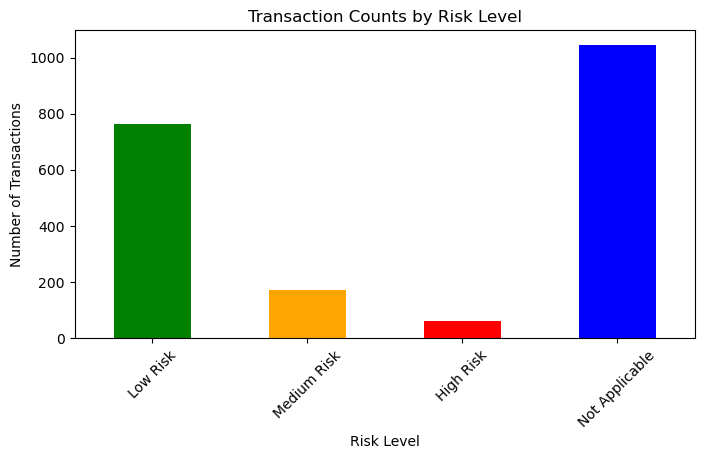

In [159]:
risk_level_counts = pd.Series({
    "Low Risk": low_risk_transactions.shape[0],
    "Medium Risk": medium_risk_transactions.shape[0],  
    "High Risk": high_risk_transactions.shape[0],    
    "Not Applicable": not_applicable_transactions.shape[0]
})

# Plotting
risk_level_counts.plot(kind='bar', figsize=(8, 4), color=['green', 'orange', 'red', 'blue'])
plt.title('Transaction Counts by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

This is out of the testing set of 22920.

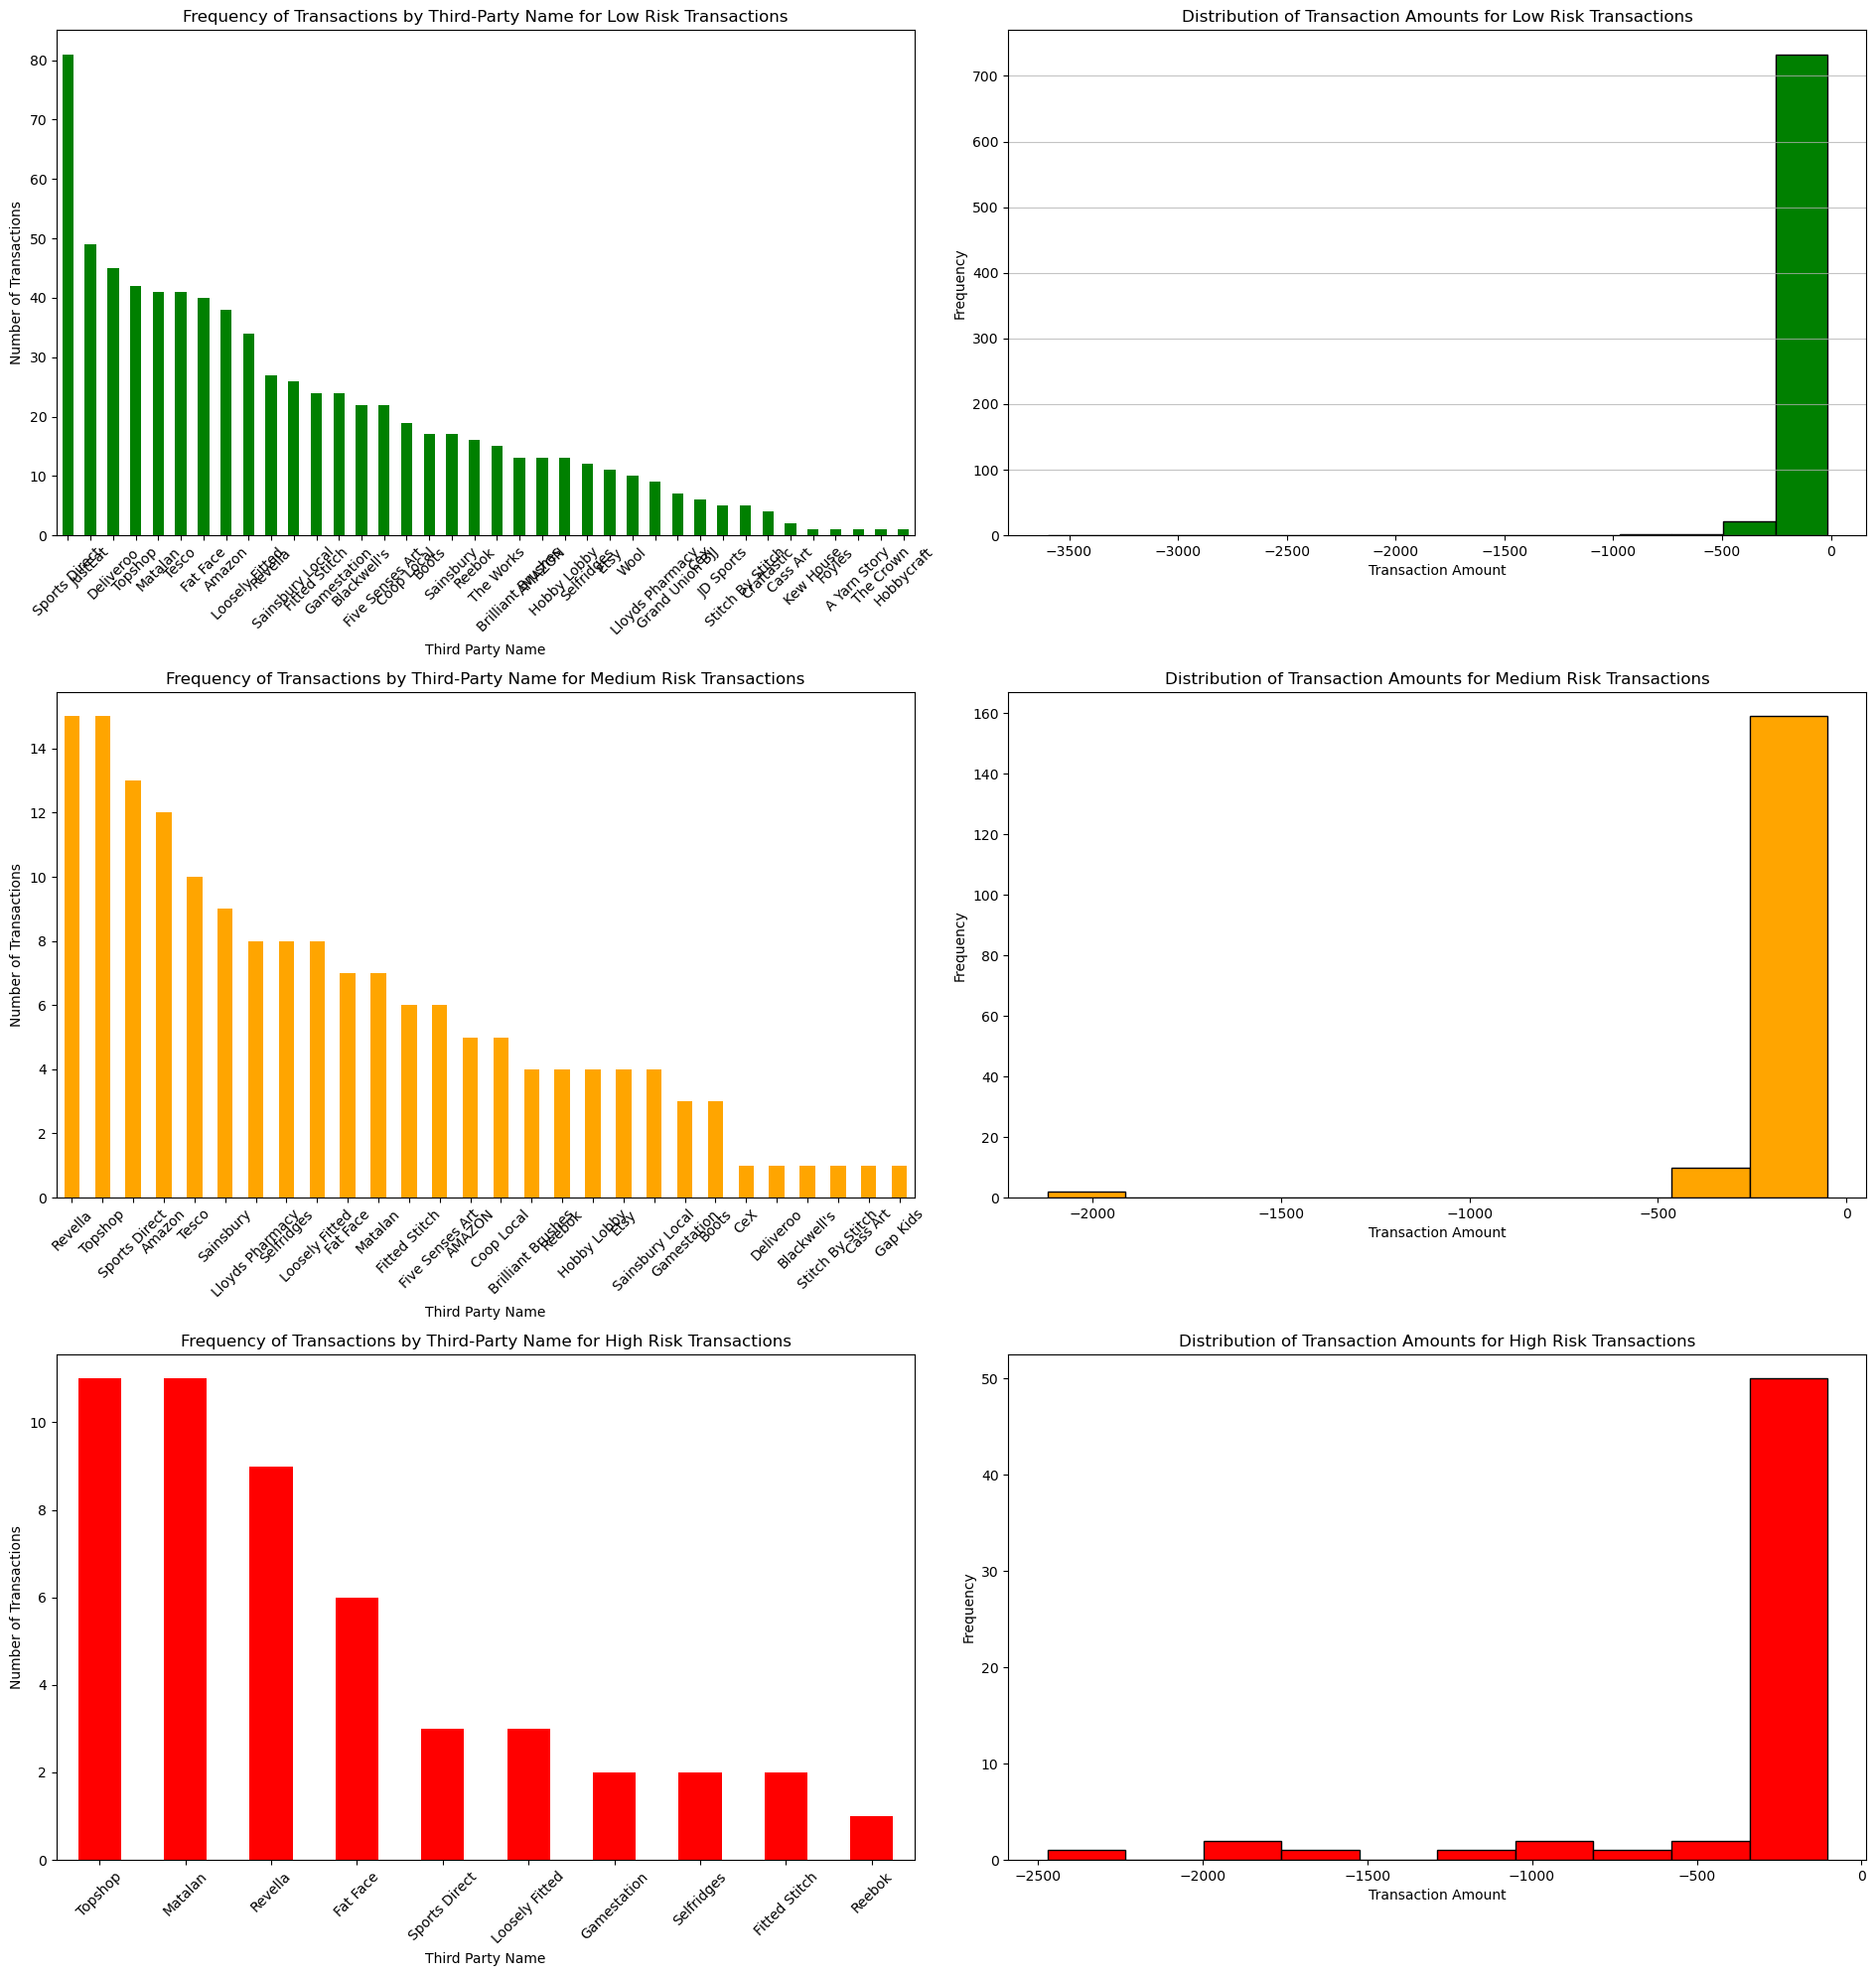

In [160]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(19, 20))

# Third-Party Name Frequency Visualization for Low Risk Transactions
third_party_counts = low_risk_transactions['Third Party Name'].value_counts()
third_party_counts.plot(kind='bar', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Frequency of Transactions by Third-Party Name for Low Risk Transactions')
axs[0, 0].set_xlabel('Third Party Name')
axs[0, 0].set_ylabel('Number of Transactions')
axs[0, 0].tick_params(axis='x', rotation=45)

# Histogram for Transaction Amounts for Low Risk Transactions
axs[0, 1].hist(low_risk_transactions['Amount'], bins=15, color='green', edgecolor='black')
axs[0, 1].set_title('Distribution of Transaction Amounts for Low Risk Transactions')
axs[0, 1].set_xlabel('Transaction Amount')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(axis='y', alpha=0.75)

# Third-Party Name Frequency Visualization for Medium Risk Transactions
medium_third_party_counts = medium_risk_transactions['Third Party Name'].value_counts()
medium_third_party_counts.plot(kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Frequency of Transactions by Third-Party Name for Medium Risk Transactions')
axs[1, 0].set_xlabel('Third Party Name')
axs[1, 0].set_ylabel('Number of Transactions')
axs[1, 0].tick_params(axis='x', rotation=45)

# Histogram for Transaction Amounts for Medium Risk Transactions
axs[1, 1].hist(medium_risk_transactions['Amount'], bins=10, color='orange', edgecolor='black')
axs[1, 1].set_title('Distribution of Transaction Amounts for Medium Risk Transactions')
axs[1, 1].set_xlabel('Transaction Amount')
axs[1, 1].set_ylabel('Frequency')

# Third-Party Name Frequency Visualization for High Risk Transactions
high_third_party_counts = high_risk_transactions['Third Party Name'].value_counts()
high_third_party_counts.plot(kind='bar', ax=axs[2, 0], color='red')
axs[2, 0].set_title('Frequency of Transactions by Third-Party Name for High Risk Transactions')
axs[2, 0].set_xlabel('Third Party Name')
axs[2, 0].set_ylabel('Number of Transactions')
axs[2, 0].tick_params(axis='x', rotation=45)

# Histogram for Transaction Amounts for High Risk Transactions
axs[2, 1].hist(high_risk_transactions['Amount'], bins=10, color='red', edgecolor='black')
axs[2, 1].set_title('Distribution of Transaction Amounts for High Risk Transactions')
axs[2, 1].set_xlabel('Transaction Amount')
axs[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


## Anomaly detection using standard deviations for the thresholds

In [110]:
# Calculate the mean and std for each account
mean_std = expenditures_training_df.groupby('Account No')['Amount'].agg(['mean', 'std'])

# Establishing thresholds based on standard deviations from the mean
mean_std['Threshold_1_STD'] = mean_std['mean'] + mean_std['std'] * 1  # 1 std from the mean
mean_std['Threshold_2_STD'] = mean_std['mean'] + mean_std['std'] * 2  # 2 stds from the mean
mean_std['Threshold_3_STD'] = mean_std['mean'] + mean_std['std'] * 3  # 3 stds from the mean

# Your anomaly detection DataFrame now is mean_std with the standard deviation thresholds
anomaly_detection_by_expenditures_std_df = mean_std

# Renaming the index to 'Account No' if needed
anomaly_detection_by_expenditures_std_df.index.rename('Account No', inplace=True)

anomaly_detection_by_expenditures_std_df


,mean,std,Threshold_1_STD,Threshold_2_STD,Threshold_3_STD
Account No,,,,,
101531259.0,159.948152,251.152031,411.100183,662.252215,913.404246
104832000.0,174.883897,271.322803,446.206700,717.529503,988.852306
105375973.0,68.679481,63.704193,132.383675,196.087868,259.792061
106601471.0,41.950710,52.952844,94.903554,147.856398,200.809242
108481285.0,44.073849,138.594780,182.668628,321.263408,459.858188
...,...,...,...,...,...
995615876.0,102.713067,152.376078,255.089145,407.465224,559.841302
996042490.0,147.344789,335.140010,482.484798,817.624808,1152.764817
998390769.0,133.091057,241.452060,374.543117,615.995177,857.447236


In [111]:
def calculate_thresholds_sd(group, multiplier):
    mean = group['Amount'].mean()
    std_dev = group['Amount'].std()
    threshold = mean + (multiplier * std_dev)
    return threshold


In [112]:
# For Threshold 1 (1 * Standard Deviation)
thresholds_1 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds_sd(group, 1)).reset_index(name='Threshold_1')
thresholds_structured_1 = thresholds_1.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_1']))).to_dict()

# For Threshold 2 (2 * Standard Deviation)
thresholds_2 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds_sd(group, 2)).reset_index(name='Threshold_2')
thresholds_structured_2 = thresholds_2.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_2']))).to_dict()

# For Threshold 3 (3 * Standard Deviation)
thresholds_3 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Name']).groupby(['Account No', 'Third Party Name']).apply(lambda group: calculate_thresholds_sd(group, 3)).reset_index(name='Threshold_3')
thresholds_structured_3 = thresholds_3.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Name'], x['Threshold_3']))).to_dict()


In [113]:
anomaly_detection_by_expenditures_std_df['Business_Threshold_1'] = anomaly_detection_by_expenditures_std_df.index.map(lambda x: thresholds_structured_1.get(x, np.nan))
anomaly_detection_by_expenditures_std_df['Business_Threshold_2'] = anomaly_detection_by_expenditures_std_df.index.map(lambda x: thresholds_structured_2.get(x, np.nan))
anomaly_detection_by_expenditures_std_df['Business_Threshold_3'] = anomaly_detection_by_expenditures_std_df.index.map(lambda x: thresholds_structured_3.get(x, np.nan))


In [114]:
# For Threshold 1 (1 * Standard Deviation)
thresholds_1 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 1)).reset_index(name='Threshold_1')
thresholds_structured_1 = thresholds_1.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_1']))).to_dict()

# For Threshold 2 (2 * Standard Deviation)
thresholds_2 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 2)).reset_index(name='Threshold_2')
thresholds_structured_2 = thresholds_2.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_2']))).to_dict()

# For Threshold 3 (3 * Standard Deviation)
thresholds_3 = expenditures_training_df.dropna(subset=['Account No', 'Third Party Account No']).groupby(['Account No', 'Third Party Account No']).apply(lambda group: calculate_thresholds(group, 3)).reset_index(name='Threshold_3')
thresholds_structured_3 = thresholds_3.groupby('Account No').apply(lambda x: dict(zip(x['Third Party Account No'], x['Threshold_3']))).to_dict()


In [115]:
anomaly_detection_by_expenditures_std_df['Third_Party_Account_Threshold_1'] = anomaly_detection_by_expenditures_std_df.index.map(lambda x: thresholds_structured_1.get(x, np.nan))
anomaly_detection_by_expenditures_std_df['Third_Party_Account_Threshold_2'] = anomaly_detection_by_expenditures_std_df.index.map(lambda x: thresholds_structured_2.get(x, np.nan))
anomaly_detection_by_expenditures_std_df['Third_Party_Account_Threshold_3'] = anomaly_detection_by_expenditures_std_df.index.map(lambda x: thresholds_structured_3.get(x, np.nan))


In [116]:
# Extracting keys from 'Business_Threshold_1' to create 'user_business_interaction'
anomaly_detection_by_expenditures_std_df['user_business_interaction'] = anomaly_detection_by_expenditures_std_df['Business_Threshold_1'].apply(
    lambda x: [key for key, value in x.items() if not np.isnan(value)] if isinstance(x, dict) else None
)


anomaly_detection_by_expenditures_std_df['user_user_interaction'] = anomaly_detection_by_expenditures_std_df['Third_Party_Account_Threshold_1'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else None)



In [161]:
def get_threshold_value(user_data, key, business=None):
    value = user_data.get(key, 0)
    if isinstance(value, dict):
        return value.get(business, float('inf'))

def assess_transaction_risk(account_no, amount, third_party_account_no, third_party_name, anomaly_detection_df):
    if amount >= 0:  # Skip payments
        return "Not Applicable"
    
    # Convert the amount to positive for comparison
    amount = abs(amount)
    risk_level = "No Risk"
    user_data = anomaly_detection_df.loc[account_no].to_dict()

    
    # Initialise interactions as empty lists to ensure they're iterable
    user_user_interaction = user_data.get('user_user_interaction', []) or []
    user_business_interaction = user_data.get('user_business_interaction', []) or []
    
    # Check if third_party_account_no is not None and is in user_user_interaction
    if third_party_account_no and third_party_account_no in user_user_interaction:
        thresholds = [
            get_threshold_value(user_data, 'Third_Party_Account_Threshold_1', third_party_account_no),
            get_threshold_value(user_data, 'Third_Party_Account_Threshold_2', third_party_account_no),
            get_threshold_value(user_data, 'Third_Party_Account_Threshold_3', third_party_account_no)
        ]
    # Check if industry_category is determined and in user_industry_interaction
    elif third_party_name and third_party_name in user_business_interaction:
        thresholds = [
            get_threshold_value(user_data, 'Business_Threshold_1', third_party_name),
            get_threshold_value(user_data, 'Business_Threshold_2', third_party_name),
            get_threshold_value(user_data, 'Business_Threshold_3', third_party_name)
        ]
    else:
        # Use general thresholds if no specific interaction is found
        thresholds = [user_data['Threshold_1_STD'], user_data['Threshold_2_STD'], user_data['Threshold_3_STD']]
    
    all_thresholds_same = (thresholds[0] == thresholds[1] == thresholds[2])
    
    # Initial risk level determination based on thresholds
    risk_level = "No Risk"
    if all_thresholds_same and amount > thresholds[0]:
        risk_level = "Low Risk"
    elif not all_thresholds_same:
        if amount > thresholds[2]:
            risk_level = "High Risk"
        elif amount > thresholds[1]:
            risk_level = "Medium Risk"
        elif amount > thresholds[0]:
            risk_level = "Low Risk"
    
        # Adjust the risk level based on absolute amount thresholds
    if risk_level != "No Risk":
        # Adjust the risk level based on absolute amount thresholds
        if amount <= 15:
            risk_level = "No Risk"
        elif amount <= 50:
            risk_level = risk_level if risk_level == "No Risk" else "Low Risk"
        elif amount <= 100:
            risk_level = "Medium Risk" if risk_level == "High Risk" else risk_level
    
    return risk_level




risk_levels = [
    assess_transaction_risk(
        row['Account No'], row['Amount'], row.get('Third Party Account No'), row['Third Party Name'],
        anomaly_detection_by_expenditures_std_df
    ) for index, row in testing_transactions.iterrows()
]

testing_transactions['risk_level'] = risk_levels


testing_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,risk_level
50365,14/03/2023,18:33:00,712474734.0,-1324.548831,-31.23,NaN,Deliveroo,2023-03-14 18:33:00,Low Risk
50317,14/03/2023,17:28:00,419550103.0,6544.593463,-125.30,NaN,Loosely Fitted,2023-03-14 17:28:00,Low Risk
156768,31/08/2023,23:59:00,834581602.0,925.931550,-7.00,NaN,Xbox,2023-08-31 23:59:00,No Risk
198076,31/10/2023,09:27:00,250957494.0,1090.427100,-37.99,NaN,Sports Direct,2023-10-31 09:27:00,No Risk
46751,05/03/2023,16:34:00,675231808.0,4038.532728,-158.90,NaN,Selfridges,2023-03-05 16:34:00,No Risk
...,...,...,...,...,...,...,...,...,...
146741,16/08/2023,10:05:00,779946617.0,13089.944442,-4.84,NaN,AMAZON,2023-08-16 10:05:00,No Risk
99244,02/06/2023,10:01:00,497809732.0,1214.287223,-1.50,NaN,Five Senses Art,2023-06-02 10:01:00,No Risk
165435,10/09/2023,17:00:00,146909202.0,4552.412277,-77.00,NaN,Topshop,2023-09-10 17:00:00,No Risk
125773,16/07/2023,07:12:00,678330503.0,4077.564304,-1.56,NaN,Amazon,2023-07-16 07:12:00,No Risk


In [162]:
risk_level_counts = testing_transactions['risk_level'].value_counts()
print(risk_level_counts)


No Risk           18916
Low Risk           2238
Not Applicable     1045
Medium Risk         559
High Risk           162
Name: risk_level, dtype: int64


In [163]:
# Filter for Low Risk transactions
low_risk_transactions = testing_transactions[testing_transactions['risk_level'] == 'Low Risk']

# Filter for Medium Risk transactions
medium_risk_transactions = testing_transactions[testing_transactions['risk_level'] == 'Medium Risk']

# Filter for High Risk transactions
high_risk_transactions = testing_transactions[testing_transactions['risk_level'] == 'High Risk']

# Filter for Not Applicable transactions
not_applicable_transactions = testing_transactions[testing_transactions['risk_level'] == 'Not Applicable']


In [168]:
high_risk_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,risk_level
175960,30/09/2023,10:48:00,930277104.0,11141.312949,-235.20,NaN,Fat Face,2023-09-30 10:48:00,High Risk
14645,18/01/2023,17:22:00,643610517.0,-219.303691,-136.49,NaN,Fat Face,2023-01-18 17:22:00,High Risk
106536,17/06/2023,13:29:00,303843160.0,968.263000,-208.60,NaN,Topshop,2023-06-17 13:29:00,High Risk
186321,09/10/2023,18:10:00,897592348.0,14606.655986,-221.20,NaN,Matalan,2023-10-09 18:10:00,High Risk
218127,27/11/2023,11:21:00,901432314.0,3095.759326,-117.97,NaN,Five Senses Art,2023-11-27 11:21:00,High Risk
...,...,...,...,...,...,...,...,...,...
160201,01/09/2023,17:59:00,938992364.0,315.736654,-213.18,NaN,JD Sports,2023-09-01 17:59:00,High Risk
13832,16/01/2023,19:18:00,969697937.0,46.384084,-154.49,NaN,Tesco,2023-01-16 19:18:00,High Risk
163288,07/09/2023,02:47:00,339791565.0,-3218.838700,-250.00,NaN,Craftastic,2023-09-07 02:47:00,High Risk
53604,23/03/2023,18:27:00,229205098.0,3864.657184,-133.00,NaN,Matalan,2023-03-23 18:27:00,High Risk


In [166]:
account = anomaly_detection_by_expenditures_std_df[anomaly_detection_by_expenditures_std_df.index == 	687135796.0]
print(account['Business_Threshold_2'].values)
account

[{'A Yarn Story': nan, 'AMAZON': 83.08929047647973, 'Amazon': 51.88705934268056, "Blackwell's": 43.02023169555024, 'Blizzard': 14.99, 'Boots': 60.55721081831743, 'Cass Art': 41.81810699868732, 'Coop Local': 51.126267318547754, 'Deliveroo': 22.32478640194239, 'Disney': 7.989999999999999, 'Etsy': 30.882372076277857, 'Fat Face': 209.93581092727933, 'Fitted Stitch': 61.663769792086114, 'Five Senses Art': 121.19509296299928, 'Gamestation': 195.66294905957255, 'Halifax': 515.0, 'Hobby Lobby': 31.744433934822972, 'JustEat': 20.503980266264907, 'Lloyds Pharmacy': 54.725388369296546, 'Loosely Fitted': 62.54540835706804, 'Matalan': 46.708057546580456, 'Mojang Studios': 5.990000000000002, 'Revella': 197.40231424320686, 'Sainsbury': 74.20282615491155, 'Sainsbury Local': 42.65431031174231, 'Selfridges': 79.1929620271159, 'Sports Direct': 151.54816266108003, 'SquareOnix': 12.99, 'Stitch By Stitch': nan, 'Tesco': 224.90055362309647, 'The Works': 42.40731013943258, 'Topshop': 63.6753214691426, 'Wool':

,mean,std,Threshold_1_STD,Threshold_2_STD,Threshold_3_STD,Business_Threshold_1,Business_Threshold_2,Business_Threshold_3,Third_Party_Account_Threshold_1,Third_Party_Account_Threshold_2,Third_Party_Account_Threshold_3,user_business_interaction,user_user_interaction
Account No,,,,,,,,,,,,,
687135796.0,39.135972,81.32999,120.465961,201.795951,283.125941,"{'A Yarn Story': nan, 'AMAZON': 57.84908968268...","{'A Yarn Story': nan, 'AMAZON': 83.08929047647...","{'A Yarn Story': nan, 'AMAZON': 108.3294912702...",NaN,NaN,NaN,"[AMAZON, Amazon, Blackwell's, Blizzard, Boots,...",None


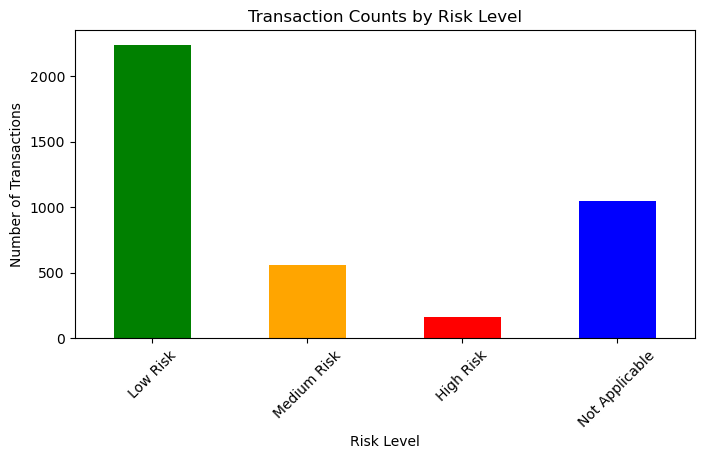

In [169]:
risk_level_counts = pd.Series({
    "Low Risk": low_risk_transactions.shape[0],
    "Medium Risk": medium_risk_transactions.shape[0],  
    "High Risk": high_risk_transactions.shape[0],    
    "Not Applicable": not_applicable_transactions.shape[0]
})

# Plotting
risk_level_counts.plot(kind='bar', figsize=(8, 4), color=['green', 'orange', 'red', 'blue'])
plt.title('Transaction Counts by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()